Imports

In [114]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt

Define a scoring function using sum of squared errors

In [115]:
def sum_squared_errors(estimator, X, y):
    return np.sum((np.reshape(estimator.predict(X), (y.shape)) - y) ** 2)

Read Data

In [116]:
data_x = np.load('Xtrain_Regression1.npy')
data_y = np.load('Ytrain_Regression1.npy')

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.1, random_state=0)

Linear Regression

In [117]:
linear = linear_model.LinearRegression()
scores = cross_val_score(linear, X_train, y_train, cv=5, scoring=sum_squared_errors)

print(scores.mean())

linear.fit(X_train, y_train)
print(linear.score(X_test, y_test))
print(sum_squared_errors(linear, X_test, y_test))

0.24567277849656088
0.9988768888304735
0.09390200503770603


Ridge Regression

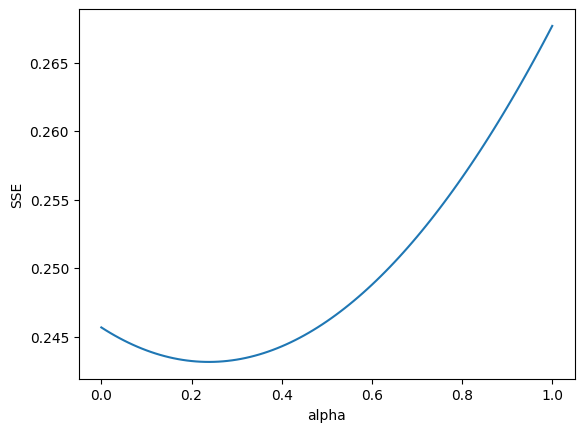

0.24
0.24315437144570087
0.9989884060060759


0.08457818503722071

In [118]:
sse = np.zeros(101)
alpha = np.linspace(0, 1, 101)

# Loop over the different values of alpha using cross validation
for i in range(101):
    ridge = linear_model.Ridge(alpha=alpha[i])
    sse[i] = cross_val_score(ridge, X_train, y_train, cv=5, scoring=sum_squared_errors).mean()

plt.plot(alpha, sse)
plt.xlabel('alpha')
plt.ylabel('SSE')
plt.show()

best_alpha_ridge = alpha[np.argmin(sse)]
print(best_alpha_ridge)
print(sse.min())

# for i in range(1001):
#     ridge = linear_model.Ridge(alpha=alpha[i])
#     ridge.fit(X_train, y_train)
#     sse[i] = sum_squared_errors(ridge, X_test, y_test)

# plt.plot(alpha, sse)
# plt.xlabel('alpha')
# plt.ylabel('SSE')
# plt.show()

# best_alpha = alpha[np.argmin(sse)]
# print(best_alpha)
# print(sse.min())

ridge = linear_model.Ridge(alpha=best_alpha_ridge)
ridge.fit(X_train, y_train)
print(ridge.score(X_test, y_test))
sum_squared_errors(ridge, X_test, y_test)

Lasso Regression

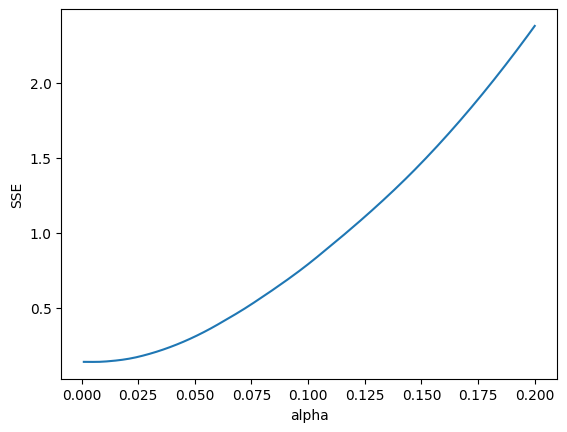

0.004
0.13811267566755836
0.9989505871146607
0.0877401781048267


In [119]:
sse = np.zeros(200)
alpha = np.linspace(0.001, 0.2, 200)

# Loop over the different values of alpha using cross validation
for i in range(200):
    lasso = linear_model.Lasso(alpha=alpha[i])
    sse[i] = cross_val_score(lasso, X_train, y_train, cv=9, scoring=sum_squared_errors).mean()

plt.plot(alpha, sse)
plt.xlabel('alpha')
plt.ylabel('SSE')
plt.show()

best_alpha_lasso = alpha[np.argmin(sse)]
print(best_alpha_lasso)
print(sse.min())

# for i in range(101):
#     lasso = linear_model.Lasso(alpha=alpha[i])
#     lasso.fit(X_train, y_train)
#     sse[i] = sum_squared_errors(lasso, X_test, y_test)

# plt.plot(alpha, sse)
# plt.xlabel('alpha')
# plt.ylabel('SSE')
# plt.show()

# best_alpha = alpha[np.argmin(sse)]
# print(best_alpha)
# print(sse.min())

lasso = linear_model.Lasso(alpha=best_alpha_lasso)
lasso.fit(X_train, y_train)
print(lasso.score(X_test, y_test))
print(sum_squared_errors(lasso, X_test, y_test))

Plot the results

0.09390200503770603
0.08457818503722071
0.0877401781048267


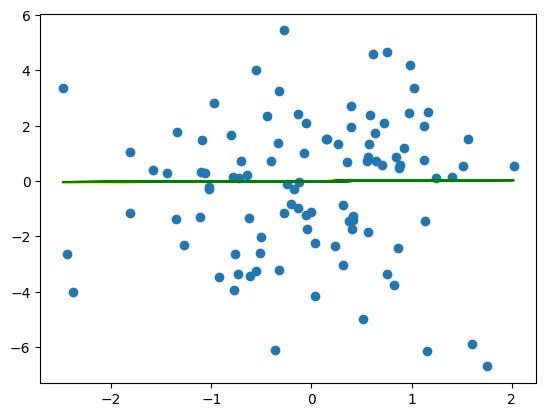

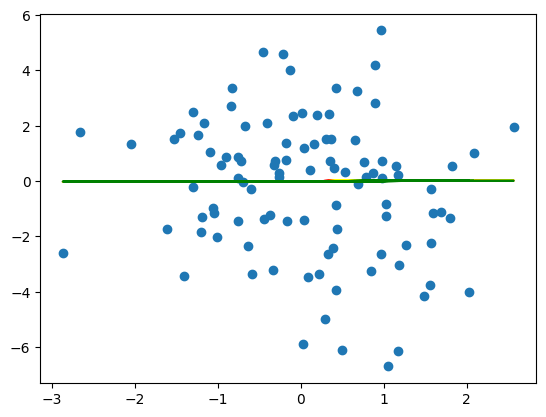

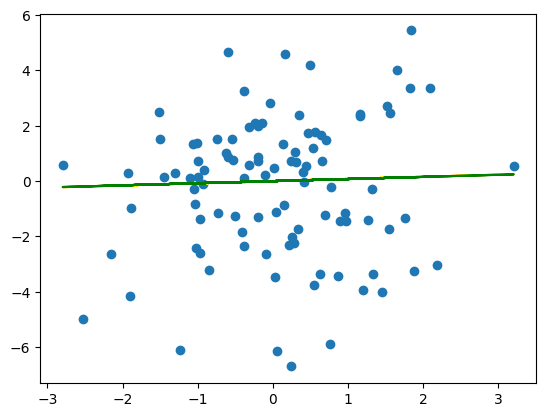

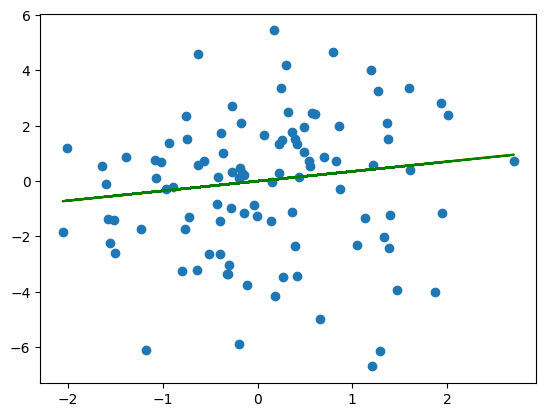

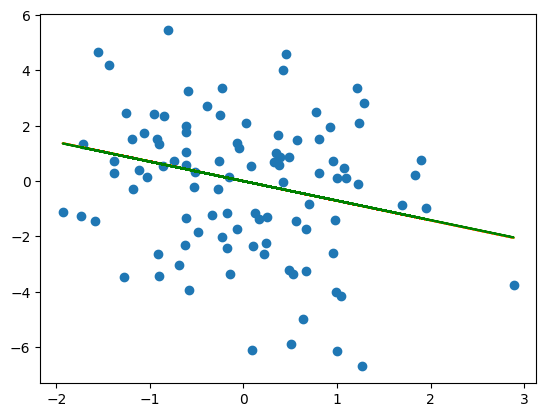

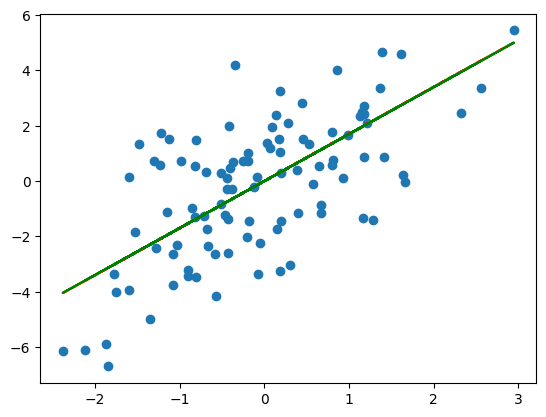

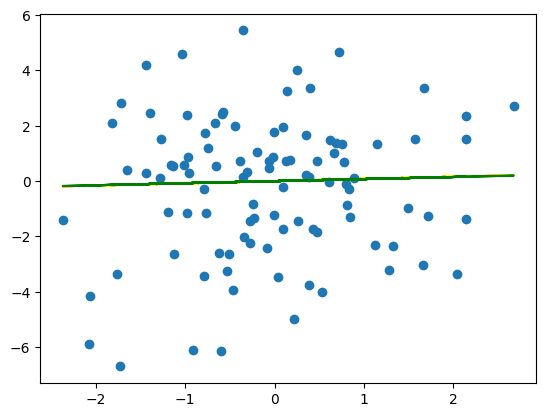

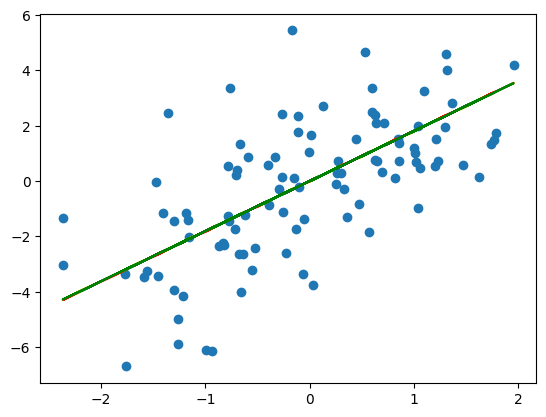

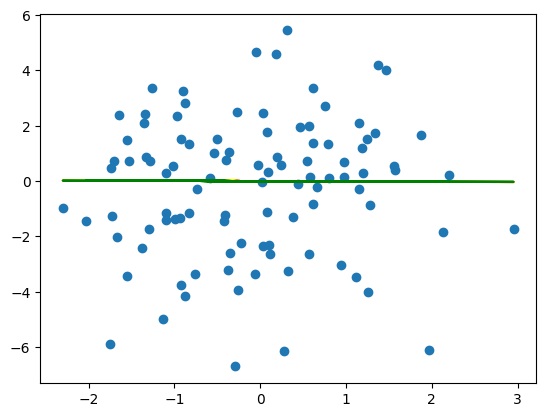

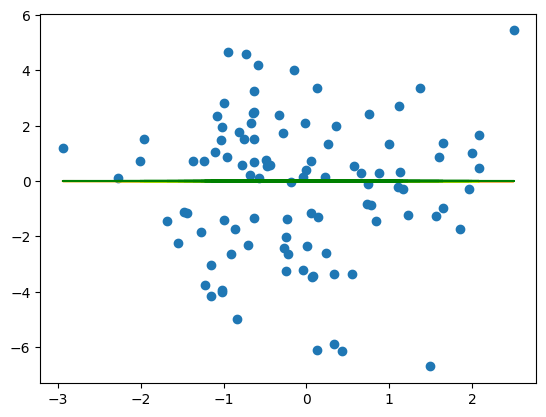

In [120]:
print(sum_squared_errors(linear, X_test, y_test))
print(sum_squared_errors(ridge, X_test, y_test))
print(sum_squared_errors(lasso, X_test, y_test))

for feature in range(10):
    plt.figure(feature)
    plt.scatter(data_x[:,feature], data_y)  
    plt.plot(data_x[:,feature], data_x[:, feature] * linear.coef_[:, feature], color="Red")
    plt.plot(data_x[:,feature], data_x[:, feature] * ridge.coef_[:, feature], color="Yellow")
    plt.plot(data_x[:,feature], data_x[:, feature] * lasso.coef_[feature], color="Green")
    plt.show()

Test

In [121]:
best_model = linear_model.Ridge(alpha = best_alpha_ridge)
best_model.fit(data_x, data_y)

data_x_test = np.load('Xtest_Regression1.npy')
y_pred = best_model.predict(data_x_test)
np.save('Ypredict_Regression1.npy', y_pred)